In [8]:
import numpy as np

def gauss_elimination(A, b):
    n = len(b)
    # Forward elimination
    print(f"Original A:\n {A}\n")
    for i in range(n):
        # Partial pivoting
        max_row = np.argmax(abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
        # Eliminate entries below pivot
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
        print(f"Matrix A after iteration {i+1}:\n{A}\n")
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

# Example usage:
A = np.array([[2.0, 1.0, -1.0],
              [-3.0, -1.0, 2.0],
              [-2.0, 1.0, 2.0]])
b = np.array([8.0, -11.0, -3.0])
x = gauss_elimination(A.copy(), b.copy())
print("matrix A:    ", A)
print("vector b:    ", b)
print("\nSystem of equations:")
for i in range(A.shape[0]):
    row = " + ".join([f"{A[i, j]:>5}*x{j+1}" if A[i, j] >= 0 else f"- {abs(A[i, j]):>4}*x{j+1}" for j in range(A.shape[1])])
    print(f"Eq{i+1}: {row} = {b[i]:>5}")

print("\nSolution:")
for i, val in enumerate(x, 1):
    print(f"x{i} = {val}")
print("Solution:", x)

Original A:
 [[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]

Matrix A after iteration 1:
[[-3.         -1.          2.        ]
 [ 0.          0.33333333  0.33333333]
 [ 0.          1.66666667  0.66666667]]

Matrix A after iteration 2:
[[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]

Matrix A after iteration 3:
[[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]

matrix A:     [[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]
vector b:     [  8. -11.  -3.]

System of equations:
Eq1:   2.0*x1 +   1.0*x2 + -  1.0*x3 =   8.0
Eq2: -  3.0*x1 + -  1.0*x2 +   2.0*x3 = -11.0
Eq3: -  2.0*x1 +   1.0*x2 +   2.0*x3 =  -3.0

Solution:
x1 = 2.0
x2 = 3.0000000000000004
x3 = -0.9999999999999999
Solution: [ 2.  3. -1.]


In [ ]:
3 0 1 −1 060 1 1 0 −1 0 −1 1 0 10

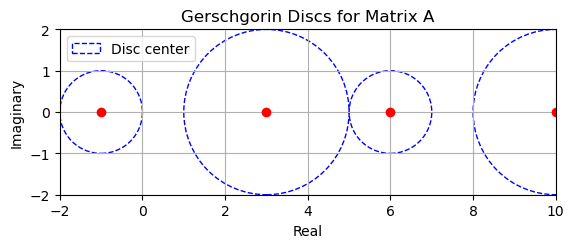

In [21]:
import matplotlib.pyplot as plt
A = np.array([[3, 0, 1],
              [0.5, 4, 0],
              [1, 1, 5]], dtype=float)
A = np.array([[3, 0, 1,-1],
              [0, 6, 0,1],
              [1, 0, -1,0],
              [-1,1,0,10]], dtype=float)
# Compute Gerschgorin discs for matrix A
fig, ax = plt.subplots()
n = A.shape[0]
for i in range(n):
    center = A[i, i]
    radius = np.sum(np.abs(A[i, :])) - np.abs(center)
    circle = plt.Circle((center.real, center.imag), radius, color='b', fill=False, linestyle='--', label='Gerschgorin disc' if i == 0 else "")
    ax.add_artist(circle)
    ax.plot(center.real, center.imag, 'ro')  # Mark the center

# Plot settings
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title("Gerschgorin Discs for Matrix A")
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.legend(['Disc center'])
ax.set_xlim(min_real - max(radii), max_real + max(radii))
ax.set_ylim(-max(radii), max(radii))
plt.show()